In [ ]:
# importing libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
sales = pd.read_csv('/content/advertising.csv')
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
print(sales.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [ ]:
print(sales.info)

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>


In [ ]:
sales.isnull() .sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
# grouping the data with respect to Target Column
gp = sales.groupby('Sales').count()
gp

,TV,Radio,Newspaper
Sales,,,
1.6,1,1,1
3.2,1,1,1
4.8,1,1,1
5.3,2,2,2
5.5,1,1,1
...,...,...,...
24.7,1,1,1
25.4,3,3,3
25.5,1,1,1


<Axes: xlabel='Sales', ylabel='count'>

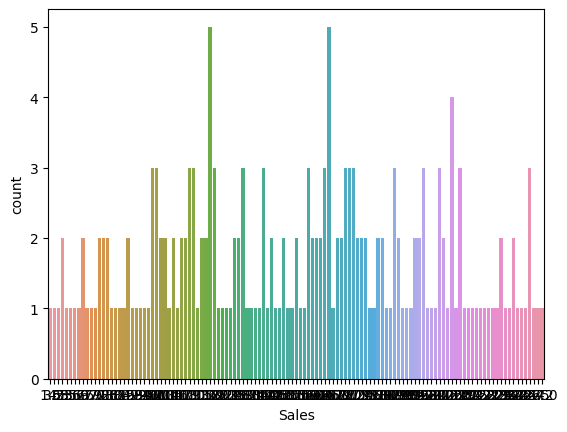

In [ ]:
# now viewing target variable distribution
sns.countplot(x= sales['Sales'], data=sales)

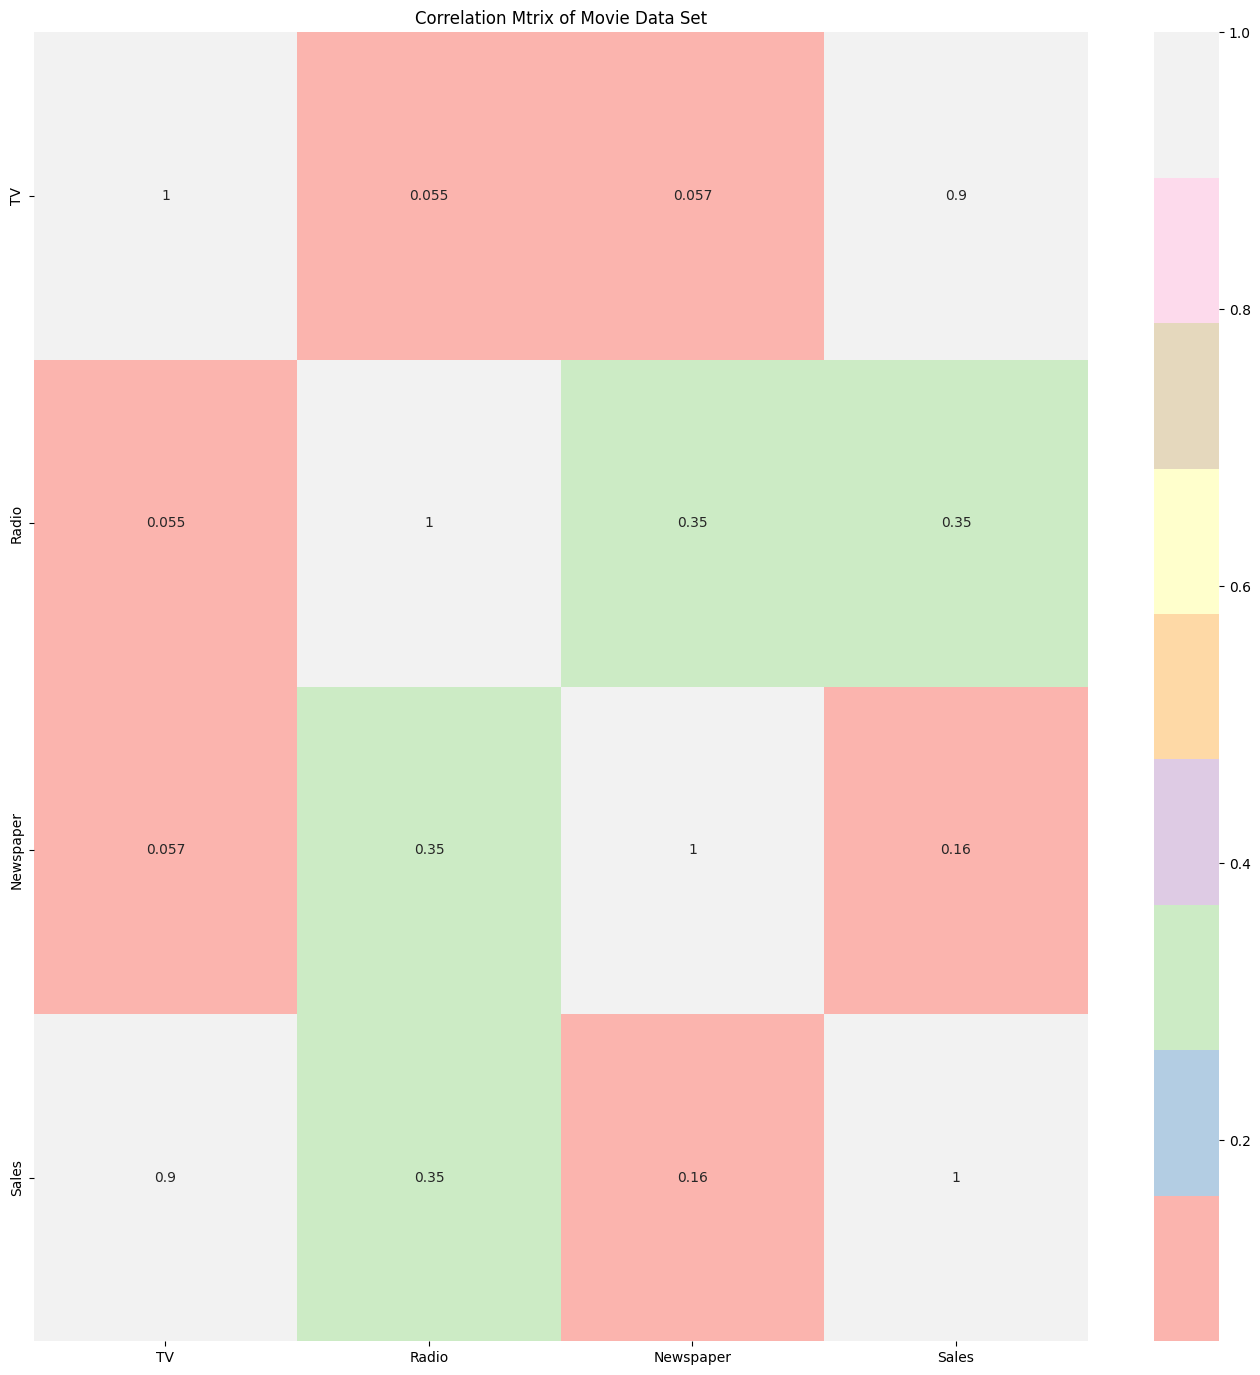

In [ ]:
sales.corr()
# finding corelations (heatmap)
correalation_matrix = sales.corr()
plt.figure(figsize = (17,17))
sns.heatmap(correalation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Mtrix of Movie Data Set')
plt.show()

In [ ]:
# Extracting Catagorical columns
catFeatures = [col for col in sales.columns if col in
               sales.select_dtypes(include=object).columns]
print(catFeatures)
# Extracting All features
features = [col for col in sales.columns if col not in ['Sales']]
print(features)

[]
['TV', 'Radio', 'Newspaper']


In [ ]:
# Spliting Features and target variable
X, y = sales.loc[:, features], sales.loc[:, 'Sales']

# Checking Data set shape (features)
print(X.shape)


(200, 3)


In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse

2.9077569102710896

In [ ]:
r2

0.9059011844150826

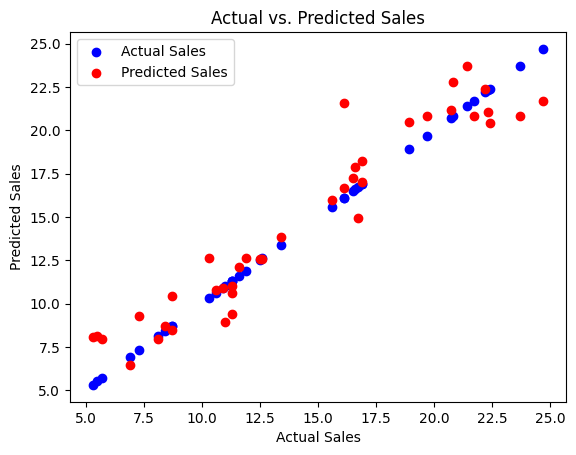

In [ ]:
# Create a scatter plot for actual sales in blue
plt.scatter(y_test, y_test, c='blue', label='Actual Sales')

# Create a scatter plot for predicted sales in red
plt.scatter(y_test, y_pred, c='red', label='Predicted Sales')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.show()